In [40]:
%run prep.py -d flights

In [2]:
import time

In [3]:
import os
import dask

In [4]:
import dask.dataframe as dd

ddf = dd.read_csv(
    os.path.join("data", "nycflights", "*.csv"), parse_dates={"Date": [0, 1, 2]}
)
ddf.head()

/Users/lidaharyton/analytics/.venv/lib/python3.11/site-packages/dask/dataframe/io/csv.py:594: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)
/Users/lidaharyton/analytics/.venv/lib/python3.11/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


/Users/lidaharyton/analytics/.venv/lib/python3.11/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/Users/lidaharyton/analytics/.venv/lib/python3.11/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/Users/lidaharyton/analytics/.venv/lib/python3.11/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = reader(bio, **kwargs)
/Users/lidaharyton/analytics/.venv/lib/python3.11/site-packages/dask/dataframe/io/csv.py:77: FutureWarning: Support for nested sequences for 'par

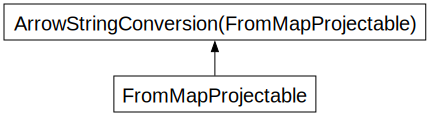

In [5]:
ddf.visualize()

In [6]:
# load and count number of rows(не працює)
"len(ddf)"

'len(ddf)'

In [7]:
ddf.head()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990-01-01,1,1621.0,1540,1747.0,1701,US,33,NaN,86.0,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990-01-02,2,1547.0,1540,1700.0,1701,US,33,NaN,73.0,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990-01-03,3,1546.0,1540,1710.0,1701,US,33,NaN,84.0,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990-01-04,4,1542.0,1540,1710.0,1701,US,33,NaN,88.0,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990-01-05,5,1549.0,1540,1706.0,1701,US,33,NaN,77.0,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [8]:
"ddf.tail()" #не працює

'ddf.tail()'

In [9]:
ddf = dd.read_csv(
    os.path.join("data", "nycflights", "*.csv"),
    parse_dates={"Date": [0, 1, 2]},
    dtype={"TailNum": str, "CRSElapsedTime": float, "Cancelled": bool},
)

/Users/lidaharyton/analytics/.venv/lib/python3.11/site-packages/dask/dataframe/io/csv.py:594: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  head = reader(BytesIO(b_sample), nrows=sample_rows, **head_kwargs)


In [10]:
ddf.tail()  # now works

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0


In [11]:
#ddf = dd.read_parquet(
#   "s3://nyc-tlc/trip data/yellow_tripdata_2012-*.parquet",
#)

In [12]:
import pandas as pd

files = os.listdir(os.path.join('data', 'nycflights'))

maxes = []

for file in files:
    df = pd.read_csv(os.path.join('data', 'nycflights', file))
    maxes.append(df.DepDelay.max())
    
final_max = max(maxes)

In [14]:
%%time
result = ddf.DepDelay.max()
result.compute()

CPU times: user 3.18 s, sys: 4.03 s, total: 7.21 s
Wall time: 2.65 s


np.float64(1435.0)

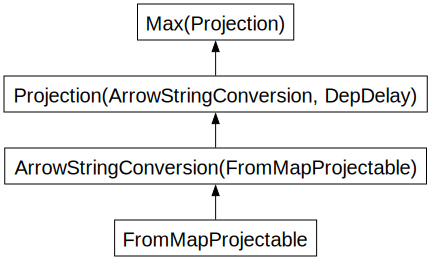

In [15]:
result.visualize()

# Lab 4

## Exercise 1

In [16]:
# 1. Кількість рядків у датасеті
num_rows = ddf.shape[0].compute()
print(f"Total rows: {num_rows}")

Total rows: 2611892


In [17]:
len(ddf)

2611892

In [18]:
# 2. Підрахунок не скасованих рейсів (Cancelled == 0)
non_canceled_flights = ddf[ddf.Cancelled == 0].shape[0].compute()
print(f"Non-canceled flights: {non_canceled_flights}")

Non-canceled flights: 2540961


3. In total, how many non-canceled flights were taken from each airport?

In [19]:
non_canceled = ddf[ddf.Cancelled == 0]

flights_per_airport = non_canceled.groupby("Origin").size().compute()
print(flights_per_airport)

Origin
EWR    1139451
JFK     427243
LGA     974267
dtype: int64


4. What was the average departure delay from each airport?

In [20]:
avg_dep_delay = ddf.groupby("Origin")["DepDelay"].mean().compute()
print(avg_dep_delay)

Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64


5. What day of the week has the worst average departure delay?

In [21]:
avg_delay_by_day = ddf.groupby("DayOfWeek")["DepDelay"].mean().compute()

worst_day = avg_delay_by_day.idxmax()
print(f"Worst average departure delay is on day: {worst_day}")

Worst average departure delay is on day: 5


6. Let’s say the distance column is erroneous and you need to add 1 to all values, how would you do this?

In [22]:
print(ddf[["Distance"]].head())

   Distance
0     319.0
1     319.0
2     319.0
3     319.0
4     319.0


In [23]:
ddf["Distance"] = ddf["Distance"] + 1

In [24]:
How many rows are in our dataset?

Object `dataset` not found.


In [25]:
ddf[["Distance"]].head()

,Distance
0,320.0
1,320.0
2,320.0
3,320.0
4,320.0


In [26]:
non_canceled = ddf[~ddf.Cancelled]
mean_delay = non_canceled.DepDelay.mean()
std_delay = non_canceled.DepDelay.std()

In [27]:
import time
start = time.time()

mean_delay_res = mean_delay.compute()
std_delay_res = std_delay.compute()

print("Execution time:", time.time() - start, "seconds")


Execution time: 5.79878306388855 seconds


In [28]:
start = time.time()

mean_delay_res, std_delay_res = dask.compute(mean_delay, std_delay)

print("Execution time:", time.time() - start, "seconds")

Execution time: 1.907318115234375 seconds


In [79]:
#dask.visualize(mean_delay, std_delay, engine="cytoscape")

In [29]:
non_cancelled = ddf[~ddf.Cancelled]
ddf_jfk = non_cancelled[non_cancelled.Origin == "JFK"]

In [30]:
start = time.time()
ddf_jfk.DepDelay.mean().compute()
ddf_jfk.DepDelay.sum().compute()
print("Execution time:", time.time() - start, "seconds")

Execution time: 5.13556694984436 seconds


In [31]:
non_cancelled = ddf[~ddf.Cancelled]
ddf_jfk = non_cancelled[non_cancelled.Origin == "JFK"]

In [32]:
ddf_jfk = ddf_jfk.persist()  # returns back control immediately

In [33]:
start = time.time()
ddf_jfk.DepDelay.mean().compute()
ddf_jfk.DepDelay.std().compute()
print("Execution time:", time.time() - start, "seconds")

Execution time: 0.0128326416015625 seconds


In [34]:
#| tags: []
help(ddf.map_partitions)

Help on method map_partitions in module dask.dataframe.dask_expr._collection:

map_partitions(func, *args, meta=<no_default>, enforce_metadata=True, transform_divisions=True, clear_divisions=False, align_dataframes=False, parent_meta=None, required_columns=None, **kwargs) method of dask.dataframe.dask_expr._collection.DataFrame instance
    Apply a Python function to each partition
    
    Parameters
    ----------
    func : function
        Function applied to each partition.
    args, kwargs :
        Arguments and keywords to pass to the function. Arguments and
        keywords may contain ``FrameBase`` or regular python objects.
        DataFrame-like args (both dask and pandas) must have the same
        number of partitions as ``self`` or comprise a single partition.
        Key-word arguments, Single-partition arguments, and general
        python-object arguments will be broadcasted to all partitions.
    enforce_metadata : bool, default True
        Whether to enforce at run

In [35]:
def my_custom_converter(df, multiplier=1):
    return df * multiplier


meta = pd.Series(name="Distance", dtype="float64")

distance_km = ddf.Distance.map_partitions(
    my_custom_converter, multiplier=0.6, meta=meta
)

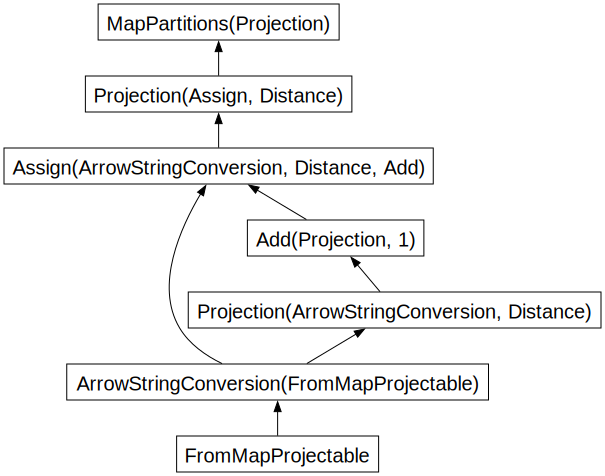

In [36]:
distance_km.visualize()

In [37]:
distance_km.head()

0    192.0
1    192.0
2    192.0
3    192.0
4    192.0
Name: Distance, dtype: float64

# Arrays

In [38]:
%run prep.py -d random

- Generating random array data... 

In [39]:
from dask.distributed import Client

client = Client(n_workers=4)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 8.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:57378,Workers: 0
Dashboard: http://127.0.0.1:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:57392,Total threads: 2
Dashboard: http://127.0.0.1:57393/status,Memory: 2.00 GiB
Nanny: tcp://127.0.0.1:57381,


2025-10-07 23:48:33,107 - distributed.comm.tcp - ERROR - Could not set timeout on TCP stream.
Traceback (most recent call last):
  File "/Users/lidaharyton/analytics/.venv/lib/python3.11/site-packages/distributed/comm/tcp.py", line 85, in set_tcp_timeout
    sock.setsockopt(socket.SOL_SOCKET, socket.SO_KEEPALIVE, 1)
OSError: [Errno 22] Invalid argument
2025-10-07 23:48:33,227 - distributed.comm.tcp - ERROR - Could not set timeout on TCP stream.
Traceback (most recent call last):
  File "/Users/lidaharyton/analytics/.venv/lib/python3.11/site-packages/distributed/comm/tcp.py", line 85, in set_tcp_timeout
    sock.setsockopt(socket.SOL_SOCKET, socket.SO_KEEPALIVE, 1)
OSError: [Errno 22] Invalid argument
2025-10-07 23:48:33,270 - distributed.comm.tcp - ERROR - Could not set timeout on TCP stream.
Traceback (most recent call last):
  File "/Users/lidaharyton/analytics/.venv/lib/python3.11/site-packages/distributed/comm/tcp.py", line 85, in set_tcp_timeout
    sock.setsockopt(socket.SOL_SOCK

In [40]:
import numpy as np
import dask.array as da

In [41]:
a_np = np.ones(10)
a_np

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [42]:
a_np_sum = a_np[:5].sum() + a_np[5:].sum()
a_np_sum

np.float64(10.0)

In [43]:
a_da = da.ones(10, chunks=5)
a_da

dask.array<ones_like, shape=(10,), dtype=float64, chunksize=(5,), chunktype=numpy.ndarray>

In [44]:
a_da_sum = a_da.sum()
a_da_sum

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [45]:
a_da_sum.compute()

np.float64(10.0)

In [46]:
start = time.time()
xn = np.random.normal(10, 0.1, size=(3000, 3000))
yn = xn.mean(axis=0)
yn
print("Execution time:", time.time() - start, "seconds")

Execution time: 0.19082212448120117 seconds


In [47]:
xd = da.random.normal(10, 0.1, size=(3000, 3000), chunks=(300, 300))
xd

dask.array<normal, shape=(3000, 3000), dtype=float64, chunksize=(300, 300), chunktype=numpy.ndarray>

In [48]:
xd.nbytes / 1e9  # Gigabytes of the input processed lazily

0.072

In [49]:
yd = xd.mean(axis=0)
yd

dask.array<mean_agg-aggregate, shape=(3000,), dtype=float64, chunksize=(300,), chunktype=numpy.ndarray>

In [50]:
start = time.time()
xd = da.random.normal(10, 0.1, size=(3000, 3000), chunks=(300, 300))
yd = xd.mean(axis=0)
yd.compute()
print("Execution time:", time.time() - start, "seconds")

Execution time: 0.46127986907958984 seconds


# Exercise 2

In [56]:
from time import time

size = (30_000, 30_000)


xd_large = da.random.normal(10, 0.1, size=size, chunks=(10000, 10000))
start = time()
xd_large.mean().compute()
print("chunks (10000,10000) time", time() - start, "секунд")


chunks (10000,10000) time 36.899101972579956 секунд


Масив ділиться на великі куски.
Їх небагато, тому обчислення мали б бути швидші, але кожен шмат займає багато пам’яті — якщо її мало- зависає.

In [59]:
#from time import time
#xd_small = da.random.normal(10, 0.1, size=size, chunks=(30, 30))
#start = time.time()
#xd_small.mean().compute()
#print("chunks (30,30) time:", time.time() - start, "секунд")

Масив ріжеться на купу дрібних шматочків. Пам’яті займає мало, але Dask витрачає купу часу, тому працює повільніше(ps на цьому етапі моя память здалась).

In [51]:
x_sum = xd + xd.T

result = x_sum.mean(axis=1)
final_result = result.compute()
final_result

array([19.99773906, 20.00344809, 19.99672926, ..., 20.00472607,
       20.00380755, 20.00145923], shape=(3000,))

In [60]:
darr = da.random.random((1000, 1000, 100))
darr

dask.array<random_sample, shape=(1000, 1000, 100), dtype=float64, chunksize=(409, 409, 100), chunktype=numpy.ndarray>

In [61]:
darr.chunksize

(409, 409, 100)

In [62]:
darr.chunks

((409, 409, 182), (409, 409, 182), (100,))

In [63]:
darr = darr.rechunk({0: -1, 1: 100, 2: "auto"})

In [64]:
darr

dask.array<rechunk-merge, shape=(1000, 1000, 100), dtype=float64, chunksize=(1000, 100, 100), chunktype=numpy.ndarray>

In [65]:
darr.chunksize

(1000, 100, 100)

In [66]:
darr.chunks

((1000,), (100, 100, 100, 100, 100, 100, 100, 100, 100, 100), (100,))

## Exercise 3

вісь 0 у нас є однією великою частиною (0: -1), тобто Dask не ріже її на блоки — це знижує паралелізм по цій осі, але потрібно менше комунікацій між блоками; натомість кожен блок споживає більше пам’яті.

In [67]:
import zarr

In [68]:
a = da.from_zarr("data/random.zarr")

In [69]:
a

dask.array<from-zarr, shape=(200000000,), dtype=float64, chunksize=(6250000,), chunktype=numpy.ndarray>

In [76]:
import time

start = time.time()
a.mean().compute()
print("Execution time:", time.time() - start, "seconds")

Execution time: 1.3207950592041016 seconds


In [77]:
b = da.from_zarr("data/random_sc.zarr")
b

dask.array<from-zarr, shape=(200000000,), dtype=float64, chunksize=(10000,), chunktype=numpy.ndarray>

In [78]:
import time

start = time.time()
b.mean().compute()
print("Execution time:", time.time() - start, "seconds")

Execution time: 18.62860894203186 seconds


# Exercise 4

In [80]:
for chunk_size in [(500, 500), (1000, 1000), (2000, 2000)]:
    print(f"\nchunks={chunk_size}")
    c = b.rechunk(chunk_size)
    %time c.mean().compute()


chunks=(500, 500)


/Users/lidaharyton/analytics/.venv/lib/python3.11/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 47.62 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


CPU times: user 2min 58s, sys: 43 s, total: 3min 41s
Wall time: 4min 36s

chunks=(1000, 1000)


/Users/lidaharyton/analytics/.venv/lib/python3.11/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 23.64 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


CPU times: user 1min 34s, sys: 14.8 s, total: 1min 49s
Wall time: 2min 22s

chunks=(2000, 2000)


/Users/lidaharyton/analytics/.venv/lib/python3.11/site-packages/distributed/client.py:3370: UserWarning: Sending large graph of size 11.72 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


CPU times: user 52.6 s, sys: 4.99 s, total: 57.6 s
Wall time: 1min 23s


дрібні чанки -багато завдань,  повільно


великі чанки-переповнення пам’яті

In [81]:
import xarray as xr

In [82]:
ds = xr.tutorial.open_dataset(
    "air_temperature",
    chunks={  # this tells xarray to open the dataset as a dask array
        "lat": 25,
        "lon": 25,
        "time": -1,
    },
)
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB dask.array<chunksize=(2920, 25, 25), meta=np.ndarray>
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [83]:
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
dask.array<open_dataset-air, shape=(2920, 25, 53), dtype=float64, chunksize=(2920, 25, 25), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [84]:
ds.air.chunks

((2920,), (25,), (25, 25, 3))

In [85]:
mean = ds.air.mean("time")  # no activity on dashboard
mean  # contains a dask array

<xarray.DataArray 'air' (lat: 25, lon: 53)> Size: 11kB
dask.array<mean_agg-aggregate, shape=(25, 53), dtype=float64, chunksize=(25, 25), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0

In [86]:
# we will see dashboard activity
#mean.load()

In [87]:
dair = ds.air

In [88]:
dair2 = dair.groupby("time.month").mean("time")
dair_new = dair - dair2
dair_new

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53, month: 12)> Size: 371MB
dask.array<sub, shape=(2920, 25, 53, 12), dtype=float64, chunksize=(2920, 25, 25, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [89]:
# things happen in the dashboard
#dair_new.load()

In [90]:
dair_resample = dair.resample(time="1w").mean("time").std("time")

/Users/lidaharyton/analytics/.venv/lib/python3.11/site-packages/xarray/groupers.py:530: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  self.index_grouper = pd.Grouper(


In [91]:
#dair_resample.load().plot(figsize=(12, 8))

In [92]:
client.shutdown()